# Machine Learning - concrete

### van: Mart Veldkamp

# Inhoudsopgave

1. Inleiding
2. Het probleem
3. Library's laden + data ophalen
4. Data visualiseren
    - kolommen visualiceren
    - Scatter matrix
    - Normaalverdeling
5. Data voorbereiden & opschonen
    - Null waardes weghalen
    - Normaliseren
    - Data opsplitsen
6. Modellen selecteren
    - Random forest (classification)
    - Gradient boosting tree
7. Modellen trainen en testen
    - Modellen trainen
    - Modellen testen
    - Bereken R^2
    - Scatterplot maken
8. Conclusie
    - Correlatie matrix

# 1. Inleiding
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem

Het probleem dat ik in deze notebook ga behandelen is het bepalen hoe stek ''concrete'' (beton) is aan de hand van een paar feutures, het idee is dat ik aan de hand van een hoge correlatie tussen de feutures en de sterkte kan voorspellen hoe sterk beton is door middel van die ene feuture. Dit is een regressie probleem omdat je kracht van een beton makkelijker kan voorspellen met regressie dan met classificatie.

# 3. Library's laden + data ophalen

Deze dataset is afkomstig van: [archive uci.edu](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import math 
import sklearn

from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from random import sample
%matplotlib inline 

In [2]:
data = pd.read_csv('Concrete_data_Yeh.csv')

print(f'De dataset heeft {data.shape[0]} rijen, en {data.shape[1]} kolommen')
print('\nDit zijn de features/target')
print(data.dtypes)

print('\nHier een kleine sample van de dataset')
data

De dataset heeft 1030 rijen, en 9 kolommen

Dit zijn de features/target
cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

Hier een kleine sample van de dataset


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


De kolommen worden als volgt geïnterpreteerd:
- cement: hoeveel kg cement er is toegevoegd in een mengsel van m3
- slag: slag (in nederlands slak) is een bijproduct bij de verwerking van erts, het heeft veel voordelen in beton, onder andere het last verminderen en verminderen van CO2 uitstoot.
- Fly Ash: Vliegas verlaagd de kostprijs en help het beton met sterkte. Het wordt gementen in kg per m3 mengsel.
- water: Hoeveel kg water er is toegevoegd in een mengsel van m3
- Superplasticizer: Dit wordt gebruikt om het water/cement ratio te verslagen in je mengsel, Dit heeft een positief effect op de sterkte van je beton.
- Coarse Aggregate: grof aggregaat wordt toegevoegd voor het verbinden van het beton, zodat het nog sterker is.
- Fine Aggregate: fijn aggregaat wordt toegevoegd om dezelfde reden als grof aggregaat, om het beton nog sterker te maken.
- Age: Hoe oud het beton is in dagen
- csMPA: Concrete compressive strength is de sterkte van het beton in MPa.

# 4. Data visualiseren

## kolommen visualiseren

In [3]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

## Scatter matrix

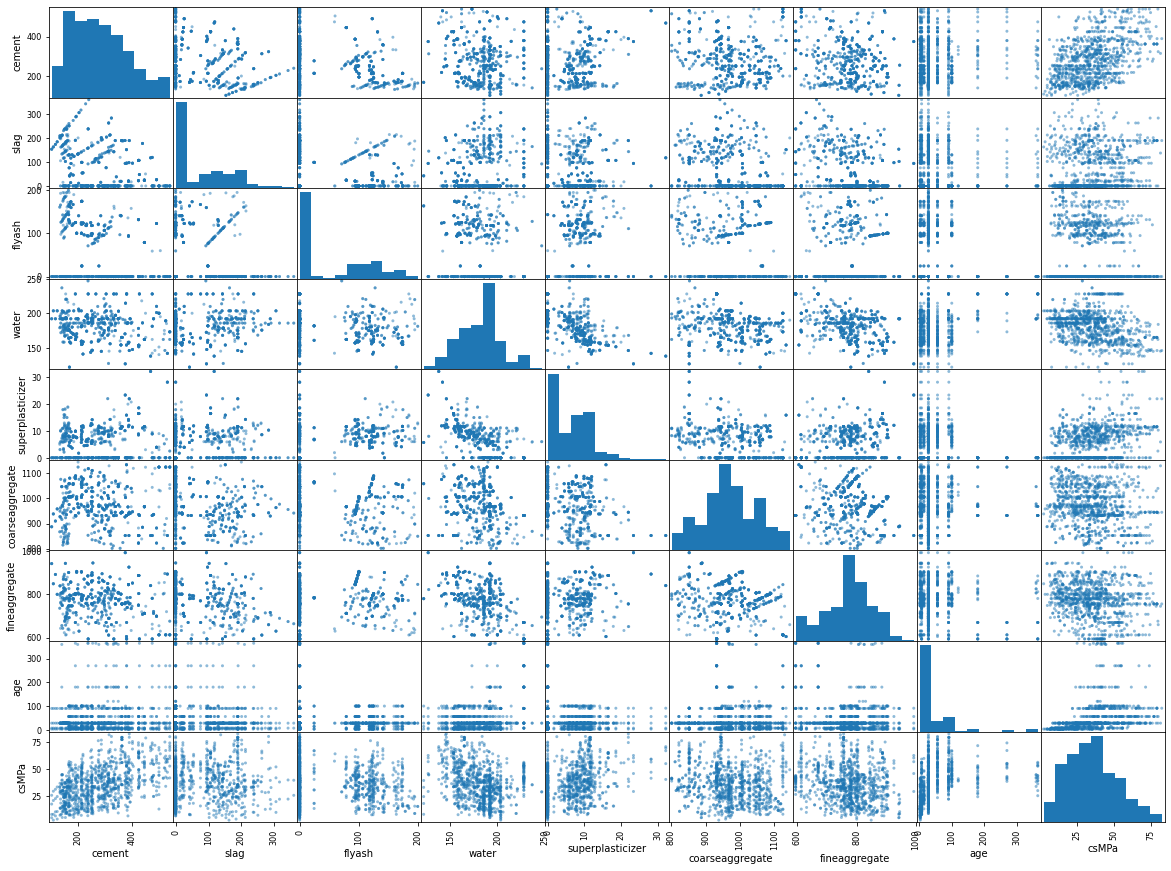

In [4]:
attributes = ['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa']
scatter_matrix(data[attributes], figsize = (20, 15))
plt.show()

## Normaalverdeling

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='csMPa', ylabel='Density'>

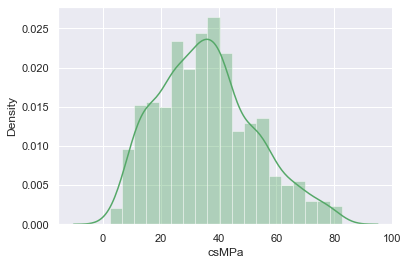

In [17]:
sns.set_theme()
sns.distplot(data['csMPa'], kde=True, color='g')

Ik vind dit niet voldoende een normaal verdeling, ik hoop later in de statestiek lessen meer informatie te krijgen hoe we kunnen berkenen wanneer een histogram een normaal verdeling heeft.

# 5. Data voorbereiden & opschonen

## waardes verranderen

Om te controleren of elke kolom gevuld is kan het onderstaande gebruikt worden.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Zoals je kan zien zijn er geen 0 waardes, dus zal ik doe ook niet weg hoeven te halen.

## Normaliseren

In [25]:
data_z = data.copy()
scaler = StandardScaler().fit(data_z[['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'csMPa']])
data_z[['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'csMPa']] = scaler.transform(data_z[['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'csMPa']])


## Data opsplitsen

In [26]:
x_data = data.drop('csMPa', axis=1)
y_data = data['csMPa']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

# 6. Modellen selecteren & instellen

voor deze opdracht zullen 2 modellen gebruikt worden:
- Random forest (regression)
- Gradient boosting tree

# 7. Modellen trainen en testen

## Random forest

### Train en test het model

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

### Bereken R^2

In [28]:
score = rf_model.score(x_test, y_test)
print(score)

0.8773208427040586


Dit is een erg hoge accracy

### Scatterplot maken

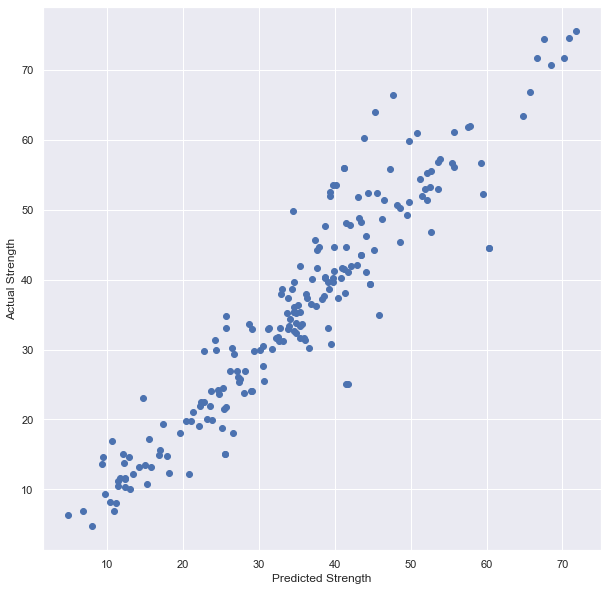

In [29]:
plt.figure(figsize=(10,10))
plt.xlabel('Predicted Strength')
plt.ylabel('Actual Strength')
plt.scatter(rf_pred, y_test)

## Gradient boosting tree

### Train en test het model

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

gb_pred = gb_model.predict(x_test)

### Bereken R^2

In [31]:
score = gb_model.score(x_test, y_test)
print(score)

0.8828094734843024


### Scatterplot

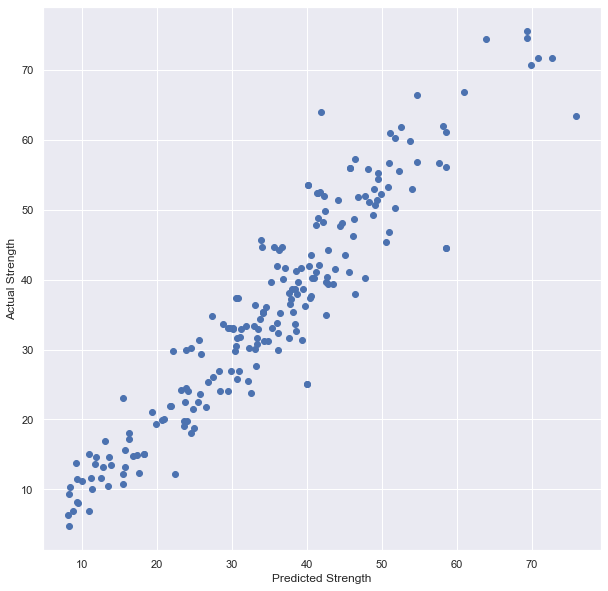

In [32]:
plt.figure(figsize=(10,10))
plt.xlabel('Predicted Strength')
plt.ylabel('Actual Strength')
plt.scatter(gb_pred, y_test);

# 8. Conclusie

## Conclusie Random forest vs gradient boosting tree

Mijn conlusie is, is dat zowel Random forest als gradient tree allebei wel goed werken. Bij het voorspellen van beton kan het belang van accuratie verschillen. Maar voor normale onderzoeken is een accuracy van 88% mooi.

## Correlatie matrix

Bij een correlatiematrix wordt de Pearson's T gebruikt. Dit correlatiecoëfficient zegt iets over twee features; als er een hoge positieve correlatie ism dat dan als het gemiddelde van ene omhoog gaat, dat de andere dan ook omhoog gaat, of juist allebei omlaag. Bij een negatieve correlatie gaat het juist andersom, dit houdt in dat als de ene omhoog gaat, de andere juist omlaag gaat. Bijvoorbeeld bij het wachten op de trein en algeme ervaring; Hoe langer iemand wacht (omhoog), hoe slechter de algemene ervaring (omlaag).

<AxesSubplot:>

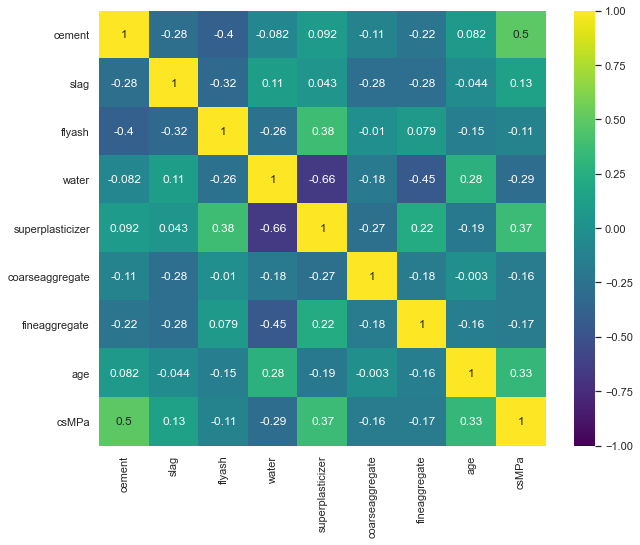

In [34]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)